# Aim: Finding correlation between UPDRS score and mobility features (extracted from sensors)

## Part 1:

## Preparing UPDRS scores


### Importing UPDRS assessment file and calculating the sub-total score

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [3]:
updrs_data=pd.read_excel('CAMERA_DATA_LABELS_2020-08-13_1400.xlsx')
updrs_data


,Study ID,ID,folder,Survey Identifier,Study population,Sex,Age (Years),Month and Year of PD diagnosis (MM/YYYY),Side most affected,Does the participant take Parkinson's medication?,...,3.16 Kinetic Tremor of the Hands Left,3.17 Rest Tremor Amplitude RUE,3.17 Rest Tremor Amplitude LUE,3.17 Rest Tremor Amplitude RLE,3.17 Rest Tremor Amplitude LLE,3.17 Rest Tremor Amplitude lip/jaw,3.18 Constancy of Rest Tremor,Were dyskinesias (chorea or dystonia) present during examination?,"If yes, did these movements interfere with your ratings?",Hoehn and Yahr Stage
0,1001,NaN,NaN,NaN,Parkinson's disease,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,9317.0,20200109.0,NaN,Parkinson's disease,Male,65.0,2020-12-07,Left,Yes,...,Slight,Normal,Mild,Normal,Normal,Normal,Moderate,No,NaN,1 Unilateral involvement only
2,1003,9270.0,20191121.0,NaN,Parkinson's disease,Female,62.0,2020-11-10,Left,Yes,...,Mild,Normal,Slight,Normal,Normal,Slight,Slight,Yes,No,1 Unilateral involvement only
3,1004,9448.0,20191210.0,NaN,Parkinson's disease,Male,62.0,2020-01-08,Left,Yes,...,Normal,Normal,Normal,Normal,Slight,Normal,Slight,Yes,No,2 Bilateral involvement without impairment of ...
4,1005,9283.0,20191128.0,NaN,Parkinson's disease,Male,69.0,2020-05-09,Left,Yes,...,Slight,Normal,Moderate,Normal,Normal,Normal,Mild,Yes,No,1 Unilateral involvement only
5,1006,NaN,NaN,NaN,Parkinson's disease,Female,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1007,9769.0,20191112.0,NaN,Parkinson's disease,Male,59.0,2020-01-17,Right,Yes,...,Slight,Slight,Normal,Normal,Normal,Slight,Slight,No,NaN,1 Unilateral involvement only
7,1008,9739.0,20191114.0,NaN,Parkinson's disease,Male,72.0,2020-01-11,Left,Yes,...,Slight,Normal,Slight,Normal,Normal,Normal,Slight,No,NaN,1 Unilateral involvement only
8,1009,9964.0,20191119.0,NaN,Parkinson's disease,Male,62.0,2020-03-12,Left,Yes,...,Slight,Normal,Slight,Normal,Normal,Normal,Slight,No,NaN,1 Unilateral involvement only
9,1010,9285.0,20191120.0,NaN,Parkinson's disease,Male,67.0,2020-03-13,Both sides the same,Yes,...,Mild,Normal,Slight,Moderate,Normal,Normal,Slight,No,NaN,2 Bilateral involvement without impairment of ...


In [10]:
# Slice data to mobility features
df1 = updrs_data.loc[:28,'3.8 Leg Agility Right':'3.14 Global Spontaneity of Movement (Body Bradykinesia)']

# Map the values in the assessment scores to numerical values
mapping = {'Normal':0, 'Slight':1, 'Mild':2, 'Moderate':3, 'Severe':4 }

df2 =pd.DataFrame()

for i in df1.columns:
    df2[i] = df1[i].map(mapping)

updrs_scores = pd.DataFrame(df2.sum(axis=1),columns=['Scores'])
updrs_scores['Folder'] = updrs_data['folder']
updrs_scores['ID'] = updrs_data['ID']
#updrs_scores

### Mapping subject IDs

In [11]:
subjects_PD_id_dict = {
                            'S02': 9739, 'S03': 9285, 'S04': 9769, 'S05': 9964, 
               'S06': 9746, 'S07': 9270,              'S09': 9283, 'S10': 9107, 
               'S11': 9455, 'S12': 9713, 'S13': 9317, 'S14': 9210, 'S15': 9403,
               'S16': 9791, 'S17': 9813, 'S18': 9525, 'S19': 9419,  
               'S21': 9339, 'S22': 9754, 'S23': 9392, 'S24': 9810,  
                                                                   'S30': 9629, 
                            'S32': 9448, 'S33': 9993, 'S34': 9182, 'S35': 9351,
                }   
# Convert the dictionary into a list of tuples
subject_id_tuples = [(subj, ID) for subj, ID in subjects_PD_id_dict.items()]

# Create a DataFrame from the list of tuples
subjects_PD_id_df = pd.DataFrame(subject_id_tuples, columns=['Subject', 'ID'])
updrs_scores_mappedID = pd.merge(subjects_PD_id_df,updrs_scores,how='left', on='ID')
#updrs_scores_mappedID

In [12]:
import numpy as np

# Subject ID information
subjects_PD       = [              'S02',      'S03',    'S04',      'S05',
                     'S06',        'S07',                'S09',      'S10',
                     'S11',        'S12',      'S13',    'S14',      'S15',
                     'S16',        'S17',      'S18',    'S19',
                     'S21',        'S22',      'S23',    'S24',
                                                                     'S30',
                                   'S32',      'S33',    'S34',      'S35']

# healthy_controls  = ['S08','S20','S25','S26','S27']
# subjects_new_sys = ['S01', 'S28', 'S29', 'S31']

# subjects_All      = ['S01',       'S02',     'S03',     'S04',     'S05',
#                      'S06',       'S07',     'S08',     'S09',     'S10',
#                      'S11',       'S12',     'S13',     'S14',     'S15', 
#                      'S16',       'S17',     'S18',     'S19',     'S20',
#                      'S21',       'S22',     'S23',     'S24',     'S25',
#                      'S26',       'S27',     'S28',     'S29',     'S30',
#                      'S31',       'S32',     'S33',     'S34',     'S35']

subjects_PD_date = [           '20191114','20191120','20191112','20191119',
                    '20200220','20191121',           '20191128','20191203',
                    '20191204','20200108','20200109','20200121','20200122',
                    '20200123','20200124','20200127','20200130',
                    '20200206','20200207','20200213','20200214',
                                                                '20200206',
                               '20191210','20191212','20191218','20200227']


# Subject ID mapping
subjects_PD_id_dict = {
                            'S02': 9739, 'S03': 9285, 'S04': 9769, 'S05': 9964, 
               'S06': 9746, 'S07': 9270,              'S09': 9283, 'S10': 9107, 
               'S11': 9455, 'S12': 9713, 'S13': 9317, 'S14': 9210, 'S15': 9403,
               'S16': 9791, 'S17': 9813, 'S18': 9525, 'S19': 9419,  
               'S21': 9339, 'S22': 9754, 'S23': 9392, 'S24': 9810,  
                                                                   'S30': 9629, 
                            'S32': 9448, 'S33': 9993, 'S34': 9182, 'S35': 9351,
                }   

# The big man. We can build him... we have the technology...
subjects_big_dict = {
               
                'S02': {'id': 9739, 'date': '20191114', 'path': None}, 'S03': {'id': 9285, 'date': '20191120', 'path': None}, 
                'S04': {'id': 9769, 'date': '20191112', 'path': None}, 'S05': {'id': 9964, 'date': '20191119', 'path': None}, 
                'S06': {'id': 9746, 'date': '20200220', 'path': None}, 'S07': {'id': 9270, 'date': '20191121', 'path': None}, 
                                                                       'S09': {'id': 9283, 'date': '20191128', 'path': None}, 
                'S10': {'id': 9107, 'date': '20191203', 'path': None}, 'S11': {'id': 9455, 'date': '20191204', 'path': None}, 
                'S12': {'id': 9713, 'date': '20200108', 'path': None}, 'S13': {'id': 9317, 'date': '20200109', 'path': None}, 
                'S14': {'id': 9210, 'date': '20200121', 'path': None}, 'S15': {'id': 9403, 'date': '20200122', 'path': None}, 
                'S16': {'id': 9791, 'date': '20200123', 'path': None}, 'S17': {'id': 9813, 'date': '20200124', 'path': None}, 
                'S18': {'id': 9525, 'date': '20200127', 'path': None}, 'S19': {'id': 9419, 'date': '20200130', 'path': None}, 
                                                                       'S21': {'id': 9339, 'date': '20200206', 'path': None}, 
                'S22': {'id': 9754, 'date': '20200207', 'path': None}, 'S23': {'id': 9392, 'date': '20200213', 'path': None}, 
                'S24': {'id': 9810, 'date': '20200214', 'path': None},  
                 
               
                'S30': {'id': 9629, 'date': '20200206', 'path': None}, 
                'S32': {'id': 9448, 'date': '20191210', 'path': None}, 'S33': {'id': 9993, 'date': '20191212', 'path': None},
                'S34': {'id': 9182, 'date': '20191218', 'path': None}, 'S35': {'id': 9351, 'date': '20200227', 'path': None},
                }



# Labels for the PD subject UPDRS scores (1 if UPDRS score > 0)
#Y_true = np.asarray([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])


## Part 2:

## Preparing sensor output for correlation



### Building the folder path using subject IDs

In [13]:
import os

subjects_PD_path_dict = {}
folder_path = {}
initial_path = 'Z:/CAMERA/CAMERA Visits/Mobility Visit/Study Subjects/'

for i, subj in enumerate(subjects_PD):
    subjects_PD_path_dict[subj] = initial_path + subjects_PD_date[i] + '/' + str(subjects_PD_id_dict[subj])+ '/Sensor_Data/'
    # List all files and directories in the folder
    contents = os.listdir(subjects_PD_path_dict[subj])
   
    # Filter out only the directories
    directories = [item for item in contents if os.path.isdir(os.path.join(subjects_PD_path_dict[subj], item))]
  
    if directories:
        folder_path[subj] = subjects_PD_path_dict[subj] + directories[0]
    else:
        folder_path[subj] = None
        

### Task: 360 Degree turn 

In [15]:
import pandas as pd

DegTurn_csv_file_name = '360 Degree Turn_Trials.csv'
selected_features = ['Turns - Angle (degrees) [mean]' , 'Turns - Angle (degrees) [std]',
                     'Turns - Duration (s) [mean]' , 'Turns - Duration (s) [std]' ,
                     'Turns - Turn Velocity (degrees/s) [mean]' , 'Turns - Turn Velocity (degrees/s) [std]']
DegTurn_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{DegTurn_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        DegTurn_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
DegTurn_dataframe = pd.DataFrame(DegTurn_data).T.reset_index()
DegTurn_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

DegTurn_Final_data = pd.merge(DegTurn_dataframe,updrs_scores_mappedID,how='left', on='Subject').dropna()
#DegTurn_Final_data

In [19]:
# Calculate correlations between mobility features and UPDRS scores
features = DegTurn_Final_data.iloc[:,1:-3] 
DegTurn_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], DegTurn_Final_data['Scores'])
    DegTurn_correlations.append((feature, correlation))

# Print the correlations
#for feature, correlation in correlations:
#    print(f"Correlation between {feature} and UPDRS scores: {correlation:.4f}")


# Convert the correlations data into a DataFrame
DegTurn_correlation_df = pd.DataFrame(DegTurn_correlations, columns=['Feature', 'Correlation'])
#DegTurn_correlation_df

In [42]:
DegTurn_positive_mean = DegTurn_correlation_df['Correlation'][DegTurn_correlation_df['Correlation']>0].mean()
DegTurn_negative_mean = DegTurn_correlation_df['Correlation'][DegTurn_correlation_df['Correlation']<0].mean()

DegTurn_positive_SD = DegTurn_correlation_df['Correlation'][DegTurn_correlation_df['Correlation']>0].std()
DegTurn_negative_SD = DegTurn_correlation_df['Correlation'][DegTurn_correlation_df['Correlation']<0].std()

print(f"Positive mean = {DegTurn_positive_mean}")
print(f"Negative mean = {DegTurn_negative_mean}")
print(f"Positive SD = {DegTurn_positive_SD}")
print(f"Negative SD = {DegTurn_negative_SD}")

Positive mean = 0.2808262143775077
Negative mean = -0.3126122336202091
Positive SD = 0.16564227321305328
Negative SD = 0.11287618016054408


### Task: Sit to stand

In [44]:
import pandas as pd

SitStand_csv_file_name = 'Sit to Stand_trials.csv'
selected_features = ['Duration (s)' , 'Sit to Stand - Duration (s) [mean]' , 'Sit to Stand - Duration (s) [std]' ,
                     'Sit to Stand - Lean Angle (degrees) [mean]' , 'Sit to Stand - Lean Angle (degrees) [std]' ,
                     'Stand to Sit - Duration (s) [mean]' , 'Stand to Sit - Duration (s) [std]' , 
                     'Stand to Sit - Lean Angle (degrees) [mean]' , 'Stand to Sit - Lean Angle (degrees) [std]' ]

SitStand_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{SitStand_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        SitStand_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
SitStand_dataframe = pd.DataFrame(SitStand_data).T.reset_index()
SitStand_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

SitStand_Final_data = pd.merge(SitStand_dataframe,updrs_scores_mappedID,how='left', on='Subject').dropna()



In [45]:
# Calculate correlations between mobility features and UPDRS scores
features = SitStand_Final_data.iloc[:,1:-3] 
SitStand_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], SitStand_Final_data['Scores'])
    SitStand_correlations.append((feature, correlation))

# Convert the correlations data into a DataFrame
SitStand_correlation_df = pd.DataFrame(SitStand_correlations,columns=['Feature', 'Correlation'])
#SitStand_correlation_df

In [46]:
SitStand_positive_mean = SitStand_correlation_df['Correlation'][SitStand_correlation_df['Correlation']>0].mean()
SitStand_negative_mean = SitStand_correlation_df['Correlation'][SitStand_correlation_df['Correlation']<0].mean()

SitStand_positive_SD = SitStand_correlation_df['Correlation'][SitStand_correlation_df['Correlation']>0].std()
SitStand_negative_SD = SitStand_correlation_df['Correlation'][SitStand_correlation_df['Correlation']<0].std()

print(f"Positive mean = {SitStand_positive_mean}")
print(f"Negative mean = {SitStand_negative_mean}")
print(f"Positive SD = {SitStand_positive_SD}")
print(f"Negative SD = {SitStand_negative_SD}")

Positive mean = 0.31285747646739925
Negative mean = -0.08892435717616479
Positive SD = 0.15819753333269368
Negative SD = 0.03978033757461351


### Task: TUG

In [47]:
import pandas as pd

TUG_csv_file_name = 'TUG_trials.csv'
selected_features = ['Stand to Sit - Duration (s) [mean]' , 'Stand to Sit - Lean Angle (degrees) [mean]' , 
                     'Turns - Angle (degrees) [mean]' , 'Turns - Angle (degrees) [std]' ,'Turns - Duration (s) [mean]' ,
                     'Turns - Duration (s) [std]' , 'Turns - Turn Velocity (degrees/s) [mean]' ,
                     'Turns - Turn Velocity (degrees/s) [std]']
 
TUG_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{TUG_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        TUG_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
TUG_dataframe = pd.DataFrame(TUG_data).T.reset_index()
TUG_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

TUG_Final_data = pd.merge(TUG_dataframe,updrs_scores_mappedID,how='left', on='Subject')#.dropna()
#TUG_Final_data

In [48]:
# Calculate correlations between mobility features and UPDRS scores
features = TUG_Final_data.iloc[:,1:-3] 
TUG_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], TUG_Final_data['Scores'])
    TUG_correlations.append((feature, correlation))

# Convert the correlations data into a DataFrame
TUG_correlation_df = pd.DataFrame(TUG_correlations,columns=['Feature', 'Correlation'])
#TUG_correlation_df

In [50]:
TUG_positive_mean = TUG_correlation_df['Correlation'][TUG_correlation_df['Correlation']>0].mean()
TUG_negative_mean = TUG_correlation_df['Correlation'][TUG_correlation_df['Correlation']<0].mean()

TUG_positive_SD = TUG_correlation_df['Correlation'][TUG_correlation_df['Correlation']>0].std()
TUG_negative_SD = TUG_correlation_df['Correlation'][TUG_correlation_df['Correlation']<0].std()

print(f"Positive mean = {TUG_positive_mean}")
print(f"Negative mean = {TUG_negative_mean}")
print(f"Positive SD = {TUG_positive_SD}")
print(f"Negative SD = {TUG_negative_SD}")

Positive mean = 0.2446129261927947
Negative mean = -0.2106871822431935
Positive SD = 0.15170924148081597
Negative SD = 0.16605536904653093


### Task: Sway

In [52]:
import pandas as pd

Sway_csv_file_name = 'Sway_trials.csv'
selected_features = ['Postural Sway - Acc - 95% Ellipse Axis 1 Radius (m/s^2)' , 'Postural Sway - Acc - 95% Ellipse Axis 2 Radius (m/s^2)' ,
                     'Postural Sway - Acc - 95% Ellipse Rotation (radians)' , 'Postural Sway - Acc - Sway Area (m^2/s^4)' ,
                     'Postural Sway - Acc - Centroidal Frequency (Hz)' , 'Postural Sway - Acc - Centroidal Frequency (Coronal) (Hz)' ,
                     'Postural Sway - Acc - Centroidal Frequency (Sagittal) (Hz)' , 'Postural Sway - Acc - Frequency Dispersion (AD)' ,
                     'Postural Sway - Acc - Frequency Dispersion (Coronal) (AD)' , 'Postural Sway - Acc - Frequency Dispersion (Sagittal) (AD)' , 
                     'Postural Sway - Acc - Jerk (m^2/s^5)' , 'Postural Sway - Acc - Jerk (Coronal) (m^2/s^5)' , 
                     'Postural Sway - Acc - Jerk (Sagittal) (m^2/s^5)' , 'Postural Sway - Acc - Mean Velocity (m/s)' ,
                     'Postural Sway - Acc - Mean Velocity (Coronal) (m/s)' , 'Postural Sway - Acc - Mean Velocity (Sagittal) (m/s)' ,
                     'Postural Sway - Acc - Path Length (m/s^2)' , 'Postural Sway - Acc - Path Length (Coronal) (m/s^2)' , 
                     'Postural Sway - Acc - Path Length (Sagittal) (m/s^2)' , 'Postural Sway - Acc - RMS Sway (m/s^2)' , 
                     'Postural Sway - Acc - RMS Sway (Coronal) (m/s^2)' , 'Postural Sway - Acc - RMS Sway (Sagittal) (m/s^2)' , 
                     'Postural Sway - Acc - Range (m/s^2)' , 'Postural Sway - Acc - Range (Coronal) (m/s^2)' , 
                     'Postural Sway - Acc - Range (Sagittal) (m/s^2)' , 'Postural Sway - Angles - 95% Ellipse Axis 1 Radius (degrees)' ,
                     'Postural Sway - Angles - 95% Ellipse Axis 2 Radius (degrees)' , 'Postural Sway - Angles - 95% Ellipse Rotation (radians)' ,
                     'Postural Sway - Angles - Sway Area (degrees^2)' , 'Postural Sway - Angles - Duration (s)' , 
                     'Postural Sway - Angles - RMS Sway (degrees)' , 'Postural Sway - Angles - RMS Sway (Coronal) (degrees)' , 
                     'Postural Sway - Angles - RMS Sway (Sagittal) (degrees)']
 
Sway_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{Sway_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        Sway_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
Sway_dataframe = pd.DataFrame(Sway_data).T.reset_index()
Sway_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

Sway_Final_data = pd.merge(Sway_dataframe,updrs_scores_mappedID,how='left', on='Subject')#.dropna()
#Sway_Final_data

In [53]:
# Calculate correlations between mobility features and UPDRS scores
features = Sway_Final_data.iloc[:,1:-3] 
Sway_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], Sway_Final_data['Scores'])
    Sway_correlations.append((feature, correlation))

# Convert the correlations data into a DataFrame
Sway_correlation_df = pd.DataFrame(Sway_correlations,columns=['Feature', 'Correlation'])
#Sway_correlation_df

In [54]:
Sway_positive_mean = Sway_correlation_df['Correlation'][Sway_correlation_df['Correlation']>0].mean()
Sway_negative_mean = Sway_correlation_df['Correlation'][Sway_correlation_df['Correlation']<0].mean()

Sway_positive_SD = Sway_correlation_df['Correlation'][Sway_correlation_df['Correlation']>0].std()
Sway_negative_SD = Sway_correlation_df['Correlation'][Sway_correlation_df['Correlation']<0].std()

print(f"Positive mean = {Sway_positive_mean}")
print(f"Negative mean = {Sway_negative_mean}")
print(f"Positive SD = {Sway_positive_SD}")
print(f"Negative SD = {Sway_negative_SD}")

Positive mean = 0.04854833006181608
Negative mean = -0.11191155021759412
Positive SD = 0.04214641183987537
Negative SD = 0.07055626823186008


### Combining all tasks features (except gait)

In [62]:
correlation_df = pd.concat([DegTurn_correlation_df, SitStand_correlation_df, TUG_correlation_df, Sway_correlation_df], axis=0,ignore_index=True)


In [69]:
High_non_Gait_correlated_features = correlation_df[
    (correlation_df['Correlation'] > 0.3) | (correlation_df['Correlation'] < -0.3)].round( 2)
High_non_Gait_correlated_features

,Feature,Correlation
0,Turns - Angle (degrees) [mean],-0.44
1,Turns - Angle (degrees) [std],0.43
2,Turns - Duration (s) [mean],0.31
6,Duration (s),0.37
7,Sit to Stand - Duration (s) [mean],0.42
8,Sit to Stand - Duration (s) [std],0.38
17,Turns - Angle (degrees) [mean],-0.36
18,Turns - Angle (degrees) [std],0.41
21,Turns - Turn Velocity (degrees/s) [mean],-0.39


### Visualizing the correlations between mobility features and UPDRS score

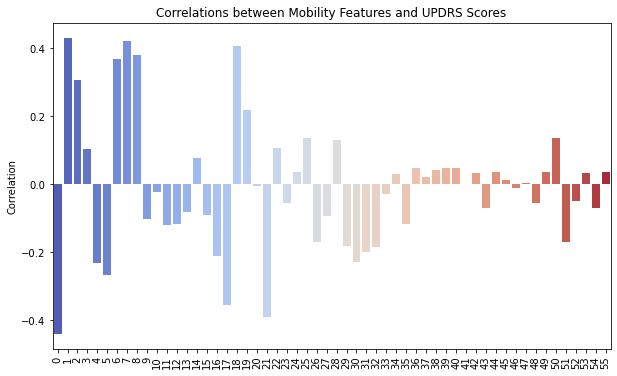

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df.index, y='Correlation', data=correlation_df , palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlations between Mobility Features and UPDRS Scores")
plt.show()

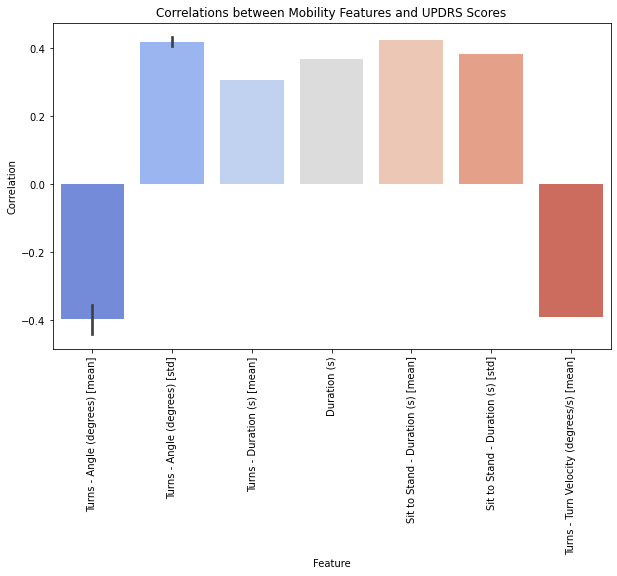

In [66]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Correlation', data=High_non_Gait_correlated_features , palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlations between Mobility Features and UPDRS Scores")
plt.show()

### Task: Gait

In [59]:
import pandas as pd

gait_features = pd.read_csv('C:/Users/hodan/Google Drive/UBC/Codes/fusion/Gait_features.csv')
#gait_features = pd.read_csv('C:/Users/sibas/Google Drive Streaming/My Drive/UBC/Codes/fusion/Gait_features.csv')

Gait_csv_file_name = 'MLK Walk_trials.csv'
selected_features = gait_features.iloc[:,0]
 
Gait_data = {}
csv_file_path = {}

for subj in folder_path:
    if folder_path[subj] is not None:  # Check if the path exists before using it
        # Combine the folder path and CSV file name to create the complete file path
        csv_file_path[subj] = f"{folder_path[subj]}/{Gait_csv_file_name}"
    else:
        csv_file_path[subj] = None  # Handle the case where folder path is None

# Read the CSV files using these paths
for subj, path in csv_file_path.items():
    if path is not None:  # Check if the path exists before trying to read the CSV
        data_frame = pd.read_csv(path,usecols = selected_features).mean()
        Gait_data[subj] = data_frame
    else:
        print(f"No CSV file path for subject: {subj}")
        
Gait_dataframe = pd.DataFrame(Gait_data).T.reset_index()
Gait_dataframe.rename(columns={'index': 'Subject'}, inplace=True)

Gait_Final_data = pd.merge(Gait_dataframe,updrs_scores_mappedID,how='left', on='Subject').dropna()


In [60]:
# Calculate correlations between mobility features and UPDRS scores
features = Gait_Final_data.iloc[:,1:-3] 
Gait_correlations = []
for feature in features.columns:
    correlation, _ = pearsonr(features[feature], Gait_Final_data['Scores'])
    Gait_correlations.append((feature, correlation))

# Convert the correlations data into a DataFrame
Gait_correlation_df = pd.DataFrame(Gait_correlations,columns=['Feature', 'Correlation'])


C:\Users\hodan\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


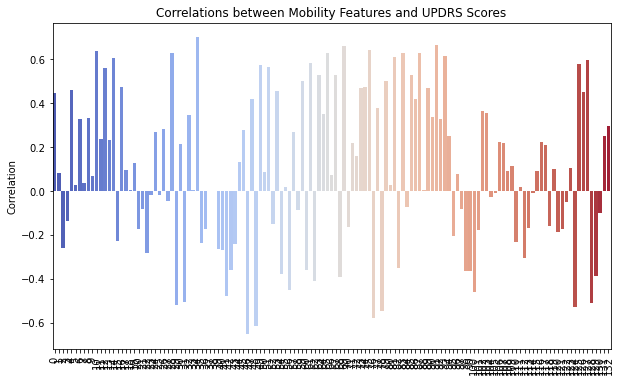

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=Gait_correlation_df.index, y='Correlation', data=Gait_correlation_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlations between Mobility Features and UPDRS Scores")
plt.show()

In [61]:
Gait_positive_mean = Gait_correlation_df['Correlation'][Gait_correlation_df['Correlation']>0].mean()
Gait_negative_mean = Gait_correlation_df['Correlation'][Gait_correlation_df['Correlation']<0].mean()

Gait_positive_SD = Gait_correlation_df['Correlation'][Gait_correlation_df['Correlation']>0].std()
Gait_negative_SD = Gait_correlation_df['Correlation'][Gait_correlation_df['Correlation']<0].std()

print(f"Positive mean = {Gait_positive_mean}")
print(f"Negative mean = {Gait_negative_mean}")
print(f"Positive SD = {Gait_positive_SD}")
print(f"Negative SD = {Gait_negative_SD}")

Positive mean = 0.3364280266280985
Negative mean = -0.2649267996485485
Positive SD = 0.21191725227328997
Negative SD = 0.17965577678923494


#### Filtering the low correlated gait features

In [75]:
High_Gait_correlated_features = Gait_correlation_df[
    (Gait_correlation_df['Correlation'] > 0.5) | (Gait_correlation_df['Correlation'] < -0.5)].round(2)
High_Gait_correlated_features

,Feature,Correlation
10,Gait - Lower Limb - Cadence Asymmetry (%Diff) ...,0.64
12,Gait - Lower Limb - Double Support L (%GCT) [std],0.56
14,Gait - Lower Limb - Double Support R (%GCT) [std],0.60
28,Gait - Lower Limb - Gait Cycle Duration Asymme...,0.63
29,Gait - Lower Limb - Gait Speed L (m/s) [mean],-0.52
31,Gait - Lower Limb - Gait Speed R (m/s) [mean],-0.50
34,Gait - Lower Limb - Gait Speed Asymmetry (%Dif...,0.70
46,Gait - Lower Limb - Foot Strike Angle L (degre...,-0.65
48,Gait - Lower Limb - Foot Strike Angle R (degre...,-0.62
49,Gait - Lower Limb - Foot Strike Angle R (degre...,0.57


### Visualizing the correlations between gait features and UPDRS score

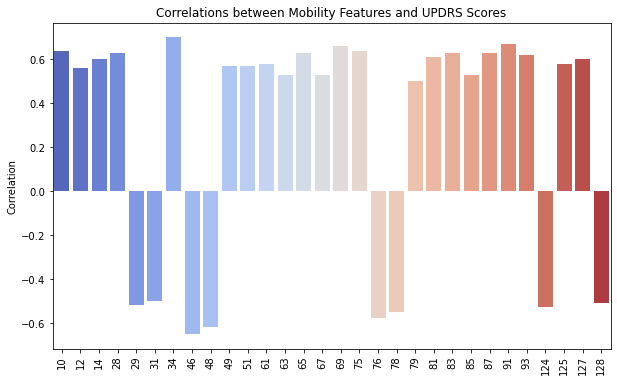

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=High_Gait_correlated_features.index, y='Correlation', data=High_Gait_correlated_features, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlations between Mobility Features and UPDRS Scores")
plt.show()
